# Inferencia estadística en python (Intervalos de confianza)

In [1]:
import numpy as np
import random
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Función para la distribución de probabilidad empírica

def ecdf (data):
    "Función para la distribución de probabilidad empírica"
    x = np.sort(data)
    n = len(data)
    y = np.arange(1,n+1)/n
    
    return x, y


# Se crea una función para unir dos conjuntos de datos y permutarlos en una muestra

def permutation_sample(data1, data2):
    """Genera una muestra permutada de dos conjuntos de datos"""

    # Concatena los conjuntos en una variable llamada data
    data = np.concatenate((data1,data2))

    # Permuta el arreglo en una variable llamada permuted_data
    permuted_data = np.random.permutation(data)

    # Particiona el arreglo en dos muestras: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Intervalos de confianza

## 1. Entendiendo el intervalo de confianza como una analogía 

Ejemplo 1:

Un ingeniero de petróleos desea conocer la porosidad de una formación para estimar la reserva total de petróleo a 9500 pies. Debido al alto costo para poder acceder a las rocas, él solo contará con 12 muestras. Las directivas de la empresa desean cono cer el peor y mejor escenario para tomar decisiones e inversión (p10 - p90). De la muestra se obtuvo una porosidad media del 14.5% y desviación estándar del 4.3%. Asumiendo que la porosidad se distribuye de manera normal, se da un intervlo así:

In [3]:
IC = stats.t.interval(0.8, 12-1, loc=14.5, scale=4.3/np.sqrt(12))
print("La prosodidad estará entre:", IC," con una confianza del 80%")

La prosodidad estará entre: (12.807569748569543, 16.19243025143046)  con una confianza del 80%


A continuación se presenta un escenario en el que se toman 12 muestras para 100 profundidades, esto con el objetivo de evidenciar los intervalos de confianza

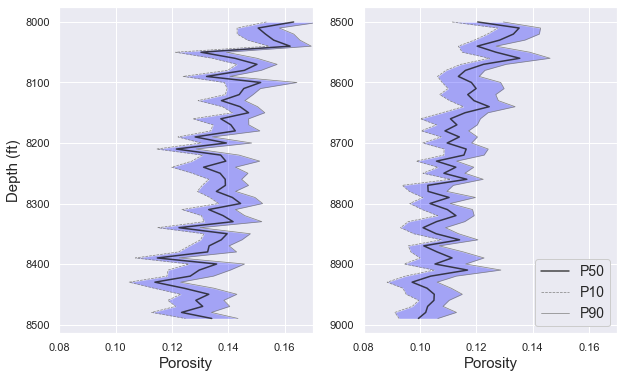

In [4]:
depth = [i * 10 + 8000 for i in range(100)]
l = len(depth)
avg_por = []
p10_por = []
p90_por = []
for i, item in enumerate(depth):

    # Se recolectan 12 rocas por cada una de las profundidades
    # Se asume que la porosidad se distribuye de manera normal
    sample_size = 12
    por_samples = np.random.normal(loc=0.15 - i/2000, scale=0.022, size=sample_size)
    avg_por.append(np.mean(por_samples))

    # intervalo de confianza del 80% para la media
    p10, p90 = stats.t.interval(1 - 0.2, sample_size - 1, loc=np.mean(por_samples), scale=stats.sem(por_samples))
    p10_por.append(p10)
    p90_por.append(p90)

# Visualizar los intervalos de confianza para todas las profundidades
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].plot(avg_por[:l//2], depth[:l//2], 'k', label='P50', alpha=0.8)
ax[0].plot(p10_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P10', linestyle='--')
ax[0].plot(p90_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P90')

ax[0].set_xlim(0.08, 0.17)
ax[0].set_ylabel('Depth (ft)', fontsize=15)
ax[0].set_xlabel('Porosity', fontsize=15)
ax[0].fill_betweenx(depth[:l//2], p10_por[:l//2], p90_por[:l//2], facecolor="blue", alpha=0.3)
ax[0].invert_yaxis()

ax[1].plot(avg_por[l//2:], depth[l//2:], 'k', label='P50', alpha=0.8)
ax[1].plot(p10_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P10', linestyle='--')
ax[1].plot(p90_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P90')

ax[1].set_xlim(0.08, 0.17)
ax[1].set_xlabel('Porosity', fontsize=15)
ax[1].legend(loc='best', fontsize=14, framealpha=1, frameon=True)
ax[1].fill_betweenx(depth[l//2:], p10_por[l//2:], p90_por[l//2:], facecolor='blue', alpha=0.3)
ax[1].invert_yaxis()

## 2. Elementos a tener en cuenta en los intervalos de confianza

**1.** Los intervalos de confianza cuantifican la incertidumbre de la estimación estadística asociada a la diferencia entre la muestra y la población

**2.** Los intervalos de confianza son el insumo para las pruebas estadísticas paramétricas

**3.** Un intervalo de confianza del 95% no quiere decir que el 95% de las observación están dentro del intervalo. El 95% se refiere a la confianza de contener al parámetro de poblacional 

**4.** Cuando el tamaño de la muestra es mayor a 30 la distribución de probabilidad converge a una distribuciión normal, en caso de ser menor se debe considerar la distribución t-student

**5.** El margen de error decrece en la media que aumente el tamaño de la muestra, es decir, están inversamente relacionados

### 2.1 Intervalo de confianza para una población

La formulación empleada para el cálculo de los intervalos de confianza está dada por:


* <font color='green'>Intervalo de confianza para la media con varianza conocida</font>
    
$$IC_{media} = \mu \pm (Z_{\alpha/2}\times\dfrac{\sigma}{\sqrt{n}})$$

* <font color='green'>Intervalo de confianza para la media con varianza desconocida</font>

$$IC_{media} = \mu \pm (t_{\alpha/2;gl}\times\dfrac{s}{\sqrt{n}})$$
$$gl = n-1$$

* <font color='green'>Intervalo de confianza para la proporción</font>

$$IC_{prop} = \hat{p} \pm (t_{\alpha/2;gl}\times{\sqrt{\dfrac{\hat{p}(1-\hat{p})}{n}})}$$

* <font color='green'>Intervalo de confianza para la varianza</font>

$$IC_{var} = \dfrac{(n-1)s^2}{\chi^2_{\alpha/2}} \leq \sigma^2 \leq \dfrac{(n-1)s^2}{\chi^2_{1- \alpha/2}}$$

## **Ejemplo**: 
### Intervalo de confianza para la media

In [5]:
np.random.seed(42)

x = np.random.normal(loc=74, scale=4.3, size=20) # Se crea una muestra aleatoria tamaño 20, media 74 y desviación estándar 4.3

alpha = 0.05                # Significancia
n = len(x)                  # Tamaño de la muestra
gl = len(x)-1               # Grados de libertad
media = np.mean(x)          # Media de la muestra
desv = np.std(x,ddof=1)     # Desviación estándar muestral. El valor de ddof es el delta en los grados de libertad (n-1)
t = stats.t.ppf(1-alpha/2, gl) # Valor crítico de t

inf = media - t*desv/np.sqrt(n) # Cálculo del límite inferior
sup = media + t*desv/np.sqrt(n) # Cálculo del límite inferior

print(inf,sup)

# También se puede hacer uso de la función del paquete stats para establecer el intervalo de confianza
print(stats.t.interval(1-alpha,gl,media,desv/np.sqrt(n)))

71.33139551903422 75.19543685256606
(71.33139551903422, 75.19543685256606)


### 2.2 Intervalo de confianza para dos poblaciones

En algunas ocasiones la atención se centra en saber si dos distribuciones o poblaciones son significativamente diferentes, por lo que se plantea la construcción de estos intervalos que a su vez permitirán plantear las respectivas pruebas de hipótesis para establecer si la diferencia es o no es significativa

La construcción de los intervalos se da en función de las características de la muestra y la estadística de interés. La forumlación esta dada por:

* <font color='green'>Inferencia para las medias, varianzas conocidas</font>
    
$$IC_{\bigtriangleup media} = (\mu_{1}-\mu_{2}) \pm Z_{\alpha/2}\times \sqrt{\dfrac{\sigma^2_{1}}{n_{1}} + \dfrac{\sigma^2_{2}}{n_{2}}}$$

* <font color='green'>Inferencia para la diferencia de medias de dos distribuciones normales, varianzas desconocidas e iguales</font>
    
$$IC_{\bigtriangleup media} = (\mu_{1}-\mu_{2}) \pm t_{\alpha/2;n_{1}+n_{2}-1}\times \sqrt{S^2_{p}(\dfrac{1}{n_{1}} + \dfrac{1}{n_{2}})}$$
$$S^2_{p} = \dfrac{(n_{1}-1)S^2_{1} + (n_{2}-1)S^2_{2}}{n_{1}+n_{2}-2}$$

* <font color='green'>Inferencia para la diferencia de medias de dos distribuciones normales, varianzas desconocidas y diferentes</font>
    
$$IC_{\bigtriangleup media} = (\mu_{1}-\mu_{2}) \pm t_{\alpha/2;v}\times \sqrt{\dfrac{S^2_{1}}{n_{1}} + \dfrac{S^2_{2}}{n_{2}}}$$
$$v = \dfrac{(\dfrac{S^2_{1}}{n_{1}} + \dfrac{S^2_{2}}{n_{2}})^2}{\dfrac{(S^2_{1}/n_{1})^2}{n_{1}+1} + \dfrac{(S^2_{2}/n_{2})^2}{n_{2}+1}} - 2$$

* <font color='green'>Inferencia sobre proporciones de dos poblaciones</font>
    
$$IC_{\bigtriangleup prop} = \hat{p_{1}}-\hat{p_{2}} \pm Z_{\alpha/2}\times{\sqrt{\dfrac{\hat{p_{1}}(1-\hat{p_{1}})}{n_{1}} + \dfrac{\hat{p_{2}}(1-\hat{p_{2}})}{n_{2}}}}$$

* <font color='green'>Inferencia sobre la varianza de dos poblaciones normales</font>

$$\dfrac{S^2_{1}}{S^2_{2}}\textit{f}_{1-\alpha/2;n_{2}-1;n_{1}-1} \leq \dfrac{\sigma^2_{1}}{\sigma^2_{2}} \leq \dfrac{S^2_{1}}{S^2_{2}}\textit{f}_{\alpha/2;n_{2}-1;n_{1}-1}$$

### Ejemplo:

* ####  Inferencia para la diferencia de medias de dos distribuciones normales, varianzas desconocidas e iguales

Gustavo Fring desea evaluar si la pureza del producto de Jesse Pinkman es igual a la de Walter White, por lo que le pide a  Gale Boetticher que construya un intervalo de confianza para conocer la diferencia de calidad de los dos productos. Gale sabe que ellos han trabajado juntos por mucho tiempo, por lo que asume que la variabilidad es similar para ambos.

In [6]:
pinkman = [97.79, 97.7, 97.35, 98.4, 96.9, 96.7, 98.1, 97.5]
white = [97.9,97.8, 99.2, 97.5, 98.2, 99.01, 97.8]

alpha = 0.05                                                 # Nivel de significancia = 5%
n1, n2 = len(pinkman), len(white)                            # Tamaño de las muestras
s1, s2 = np.var(pinkman, ddof=1), np.var(white, ddof=1)      # Varianzas muestrales
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # Desviación estándar conjunta
df = n1 + n2 - 2                                             # Grados de libertad
t = stats.t.ppf(1 - alpha/2, df)                             # Valor crítico distribución t-student

lower = (np.mean(pinkman) - np.mean(white)) - t * np.sqrt(1 / len(pinkman) + 1 / len(white)) * s
upper = (np.mean(pinkman) - np.mean(white)) + t * np.sqrt(1 / len(pinkman) + 1 / len(white)) * s

print("La diferencia en la pureza media está entre: %0.3f y %0.3f" %(lower, upper))

La diferencia en la pureza media está entre: -1.329 y 0.036


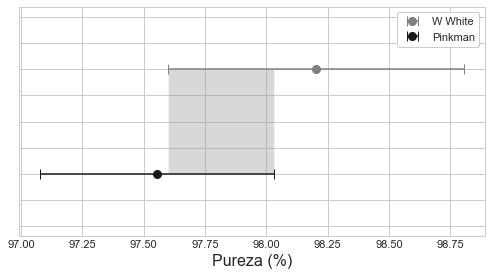

In [7]:
conf_pinkman = stats.t.interval(1-0.05,n1-1,loc=np.mean(pinkman),scale=np.sqrt(s1/n1)) # IC del 95%
conf_white = stats.t.interval(1-0.05,n2-1,loc=np.mean(white),scale=np.sqrt(s2/n2))     # IC del 95%

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(7, 4))

ax.errorbar(np.mean(white), 1, xerr=(conf_white[1] - conf_white[0]) / 2,
            fmt='o', markersize=8, capsize=5, label='W White', color='grey')
ax.errorbar(np.mean(pinkman), 0, xerr=(conf_pinkman[1] - conf_pinkman[0]) / 2,
            fmt='o', markersize=8, capsize=5, label='Pinkman', color='k')
ax.set_ylim(-0.6, 1.6)
ax.fill_betweenx([1, 0], conf_white[0], conf_pinkman[1], facecolor='grey', alpha=0.3)
ax.legend(loc='best', fontsize=11, framealpha=1, frameon=True)
ax.set_xlabel('Pureza (%)', fontsize=16)
ax.yaxis.set_major_formatter(plt.NullFormatter())
fig.tight_layout();

* #### Inferencia para la diferencia de medias de dos distribuciones normales, varianzas desconocidas y diferentes

Por otro lado, Mike es un poco más escéptico y cree que la variabilidad en la calidad del producto es diferente para ambos personajes, por lo que él contacta a uno de sus tantos amigos para construir otro intervalo de confianza.

In [8]:
gl = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1+1) + (s2/n2)**2/(n2+1))-2  # Grados de libertad
t = stats.t.ppf(1 - alpha/2, df)                                   # t-critical value for 95% CI

lower = (np.mean(white) - np.mean(pinkman)) - t * np.sqrt(1/n1 + 1/n2) * s
upper = (np.mean(white) - np.mean(pinkman)) + t * np.sqrt(1/n1 + 1/n2) * s
print("La diferencia en la pureza media está entre: %0.3f y %0.3f" %(lower, upper))

La diferencia en la pureza media está entre: -0.036 y 1.329


## 3. Bootstrap (re-muestreo)

In [9]:
# Importar datos

df = pd.read_csv("Pokemon.csv",index_col=0)
G_2 = df[df.Generation ==2].copy() # Se seleccionan los pokemon de la generación 2
G_5 = df[df.Generation ==5].copy() # Se seleccionan los pokemon de la generación 5

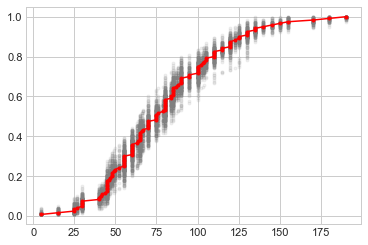

In [10]:
np.random.seed(18)

idx = random.sample(list(df.index),120)
muestra = df.iloc[idx]["Attack"]

for i in range(100):
    bs_muestra = np.random.choice(muestra,len(muestra))
    x, y = ecdf(bs_muestra)
    _ = plt.plot(x, y, marker=".", alpha=0.1, color="gray", linestyle="none")
    
x, y = ecdf(muestra)    
_ = plt.plot(x, y, marker=".", color="red")

In [11]:
# Se crea una función para determinar un estadístico en una muestra por bootstrap
def bootstrap_replicate_1d(data,func):
    "Estadístico para una muestra bootstrap de una dimensión"
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

# Función para almacenar múltiples estaísticas en un único arreglo

def draw_bs_reps(data, func, size=1):
    "Visualizar los estadísticos"
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates    

 El error estándar 3.216 corresponde a la desviación estándar de la distribución de las medias 3.236


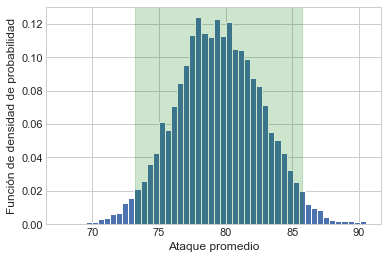

In [12]:
bs_media = draw_bs_reps(muestra,np.mean,10000)

# Calcular el error estándar de la media (desviación estándar de la distribución)
SEM = np.std(muestra)/np.sqrt(len(muestra))

# Computar la desviación estándar de las múltiples muestras
bs_std = np.std(bs_media)
print(" El error estándar %0.3f corresponde a la desviación estándar de la distribución de las medias %0.3f"
     %(SEM, bs_std))

# Visualizar la distribución de las medias
_ = plt.hist(bs_media, bins=50, density = True)
plt.xlabel("Ataque promedio")
plt.ylabel("Función de densidad de probabilidad")

conf_int = np.percentile(bs_media,[2.5,97.5])
plt.axvspan(conf_int[0], conf_int[1],color="green", alpha=0.2)
plt.show()

In [13]:
# Intervalo de confianza

confianza = 0.95
gl = muestra.size -1 
media = np.mean(muestra)
sem = stats.sem(muestra)
interalo = stats.norm.interval(confianza, media, sem)
print(interalo)

interalo_2 = stats.t.interval(confianza, gl, media, sem)
print(interalo_2)

(73.10431444616515, 85.76235222050153)
(73.03929261869209, 85.82737404797459)


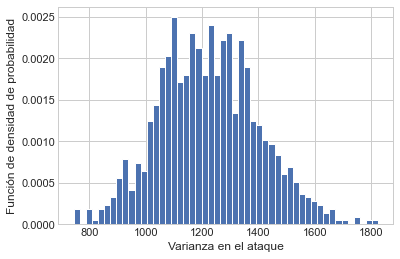

In [14]:
# Varianza

bs_var = draw_bs_reps(muestra,np.var,1000)

# Visualizar la distribución de la varianza 

_ = plt.hist(bs_var, bins=50, density = True)
plt.xlabel("Varianza en el ataque")
plt.ylabel("Función de densidad de probabilidad")
plt.show()

## Bondad de ajuste

Inicialmente se desea comparar si dos conjuntos siguen la misma distribución de datos. En este caso se desea comparar si el ataque de dos generaciones de pokemon siguen la misma distribución

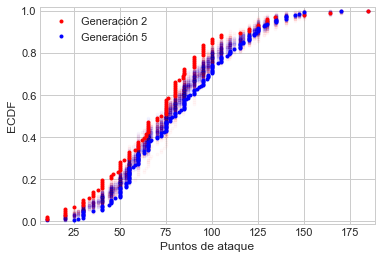

In [15]:
Attack_2 = G_2.Attack
Attack_5 = G_5.Attack

for i in range(50):
    
    # Generar muestras permutadas
    perm_sample_1, perm_sample_2 = permutation_sample(Attack_2,Attack_5)


    # Computar la distribución acumulada empírica
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Gráficar las distribuciones acumuladas para ambas muestras
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Gráficar las distribuciones acumuladas para los datos originales

x_1, y_1 = ecdf(Attack_2)
x_2, y_2 = ecdf(Attack_5)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label= "Generación 2")
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label= "Generación 5")

# Asignar nombre a los ejes, ajustar el margen y leyenda para las generaciones

plt.margins(0.02)
_ = plt.xlabel('Puntos de ataque')
_ = plt.ylabel('ECDF')
plt.legend()
plt.show()

## Pruebas de hipótesis

In [16]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

Se va a tomar una muestra para cada generación (1 y 5) de pokémon y se evaluará si tienen la misma distribución de ataque


In [17]:
G_1 = df[df["Generation"]==1]
pos = random.sample(list(G_1.index),45)

G_5 = df[df["Generation"]==5]
pos_2 = random.sample(list(G_5.index),45)

pos.extend(pos_2)
muestras = df.loc[pos]

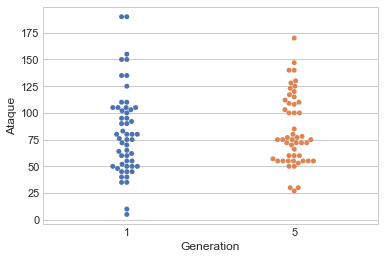

In [18]:
sns.swarmplot(x="Generation", y="Attack", data=muestras)
plt.ylabel("Ataque")
plt.show()